In [1]:
import pandas as pd
import numpy as np

import nltk

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import os

In [2]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0,tweet_id,label,text_clean
0,0,1.390000e+18,2,offered vaccine wait safe best vaccine gâ...
1,1,1.390000e+18,2,rt aminamnzr high upper middle income cou...
2,2,1.390000e+18,1,starting lyft begin providing ride codes...
3,3,1.390000e+18,0,rt gdc bsimonward heck extremely vulnerabl...
4,4,1.390000e+18,2,rt healthallamer today found husband staff ...
...,...,...,...,...
8564,8564,1.500000e+18,2,Or 🇭 have Sinovac VAED Or both I have faith se...
8565,8565,1.500000e+18,2,More people with 3 doses of the vaccine curren...
8566,8566,1.500000e+18,2,pfizer Pharma owns the journals They massage s...
8567,8567,1.500000e+18,2,pfizer He's in bed with BIG pharma getting mil...


In [3]:
X_data = df[['text_clean']].to_numpy().reshape(-1)
Y_data = df[['label']].to_numpy().reshape(-1)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 42)

In [4]:
def vectorize(data, tfidf_vect_fit):
    X_tfidf = tfidf_vect_fit.transform(data)
    words = tfidf_vect_fit.get_feature_names_out()
    X_tfidf_df = pd.DataFrame(X_tfidf.toarray())
    X_tfidf_df.columns = words
    return(X_tfidf_df)

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
tfidf_vect = TfidfVectorizer(analyzer = lambda x: nltk.word_tokenize(x))
tfidf_vect_fit = tfidf_vect.fit(X_train)
X_train = vectorize(X_train, tfidf_vect_fit)

In [7]:
rfClf = RandomForestClassifier(n_estimators = 200) # 200 trees. 
svmClf = SVC(probability = True, random_state = 0) # probability calculation
logClf = LogisticRegression(random_state = 0)

clf2 = VotingClassifier(estimators = [('rf', rfClf), ('svm', svmClf), ('log', logClf)], voting = 'soft') 

In [9]:
# train the ensemble classifier
clf2.fit(X_train, Y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                             ('svm', SVC(probability=True, random_state=0)),
                             ('log', LogisticRegression(random_state=0))],
                 voting='soft')

In [10]:
clf2.score(X_train, Y_train)

0.9861415025528811

In [11]:
X_test = vectorize(X_test, tfidf_vect_fit)

In [12]:
Y_pred = clf2.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6866977829638273


In [14]:
precision = precision_score(Y_test, Y_pred, average='micro')
print(f"Precision: {precision}")

Precision: 0.6866977829638273


In [15]:
recall = recall_score(Y_test, Y_pred, average='micro')
print(f"Recall: {recall}")

Recall: 0.6866977829638273


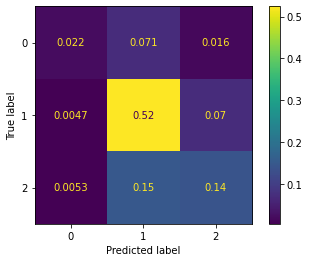

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    Y_test,
    Y_pred,
    normalize = 'all'
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0a860f2d-c036-4b61-8b0f-a2fa5b54fb03' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>